# TP 4 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *

In [2]:
from functions import *

In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
### 1. Dada la imagen *lena_gray.tif* se pide obtener:

* El negativo de la imagen.
* Una transformación tal que convierta los valores entre [0.25 0.5] al rango [0 1].

(Usar imadjust de Matlab pero implementarlo en Python)

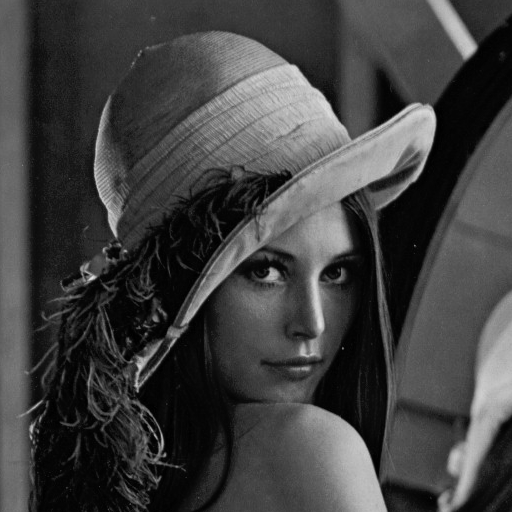

In [66]:
lena = Image.open('img/lena_gray.tif')
w, h = lena.size
displayImage(lena, w, h)

Negativo

$s = L - 1 - r$

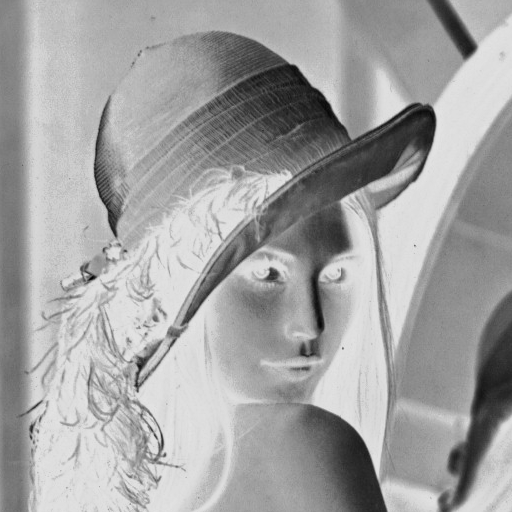

In [67]:
lena_arr = np.asarray(lena)
L = np.max(lena_arr) + 1    # Niveles de grises en la imagen
lena_neg = L - 1 - lena_arr     # Ecuación del negativo
displayImage(Image.fromarray(lena_neg), w, h)

[0.25 0.5] $\rightarrow$ [0 1]

La imagen original tiene valores desde 0 hasta $L-1$.

Se dividen todos los valores por $L-1$ tal que el máximo es $1.0$.

Todos los valores < 0.25 $\rightarrow$ 0.0

Todos los valores > 0.5 $\rightarrow$ 1.0

Se multiplican todos los valores por $L-1$ para volver a la escala original.

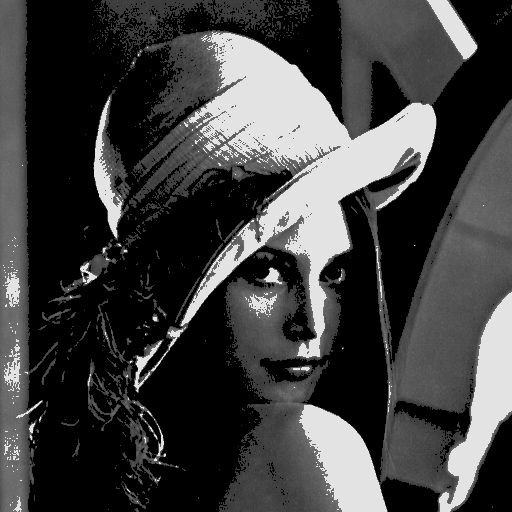

In [70]:
lena_float = np.asarray(lena, dtype=float)/(L-1)
lena_scaled = imadjust(lena_float, 0.25, 0.5, 0, 1)
lena_scaled = lena_scaled*(L-1)
lena_scaled = lena_scaled.astype(np.uint8)
displayImage(Image.fromarray(lena_scaled), w, h)

***
### 2. Dada la imagen del globo ocular *eyebw.jpg*, buscar transformaciones que permitan resaltar las venas lo mejor posible.

***
### 3. Bit Plane Slicing
* Reproducir el ejemplo de la teoría del fractal 8 bit.

In [92]:
import numpy as np

def bitslice(img, bit):

    mask = (1 << bit) * np.ones(np.shape(img), dtype='uint8')

    sliced_img = np.bitwise_and(mask, img)

    # Normalize to the [0,255] range
    sliced_img = np.uint8((sliced_img - sliced_img.min()) / (sliced_img.max() - sliced_img.min()) * 255)

    return sliced_img

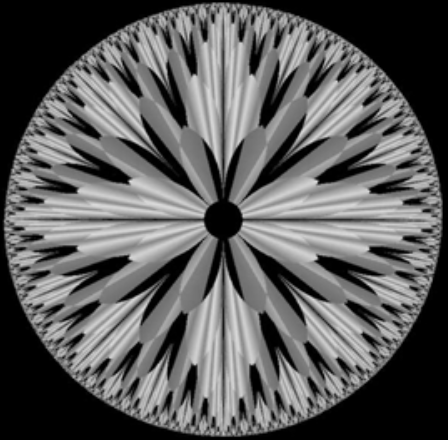

In [93]:
fractal = Image.open('img/fractal.png')
w, h = fractal.size
displayImage(fractal, w, h)

In [94]:
slice_1 = bitslice(fractal, 0)
slice_2 = bitslice(fractal, 1)
slice_3 = bitslice(fractal, 2)
slice_4 = bitslice(fractal, 3)
slice_5 = bitslice(fractal, 4)
slice_6 = bitslice(fractal, 5)
slice_7 = bitslice(fractal, 6)
slice_8 = bitslice(fractal, 7)

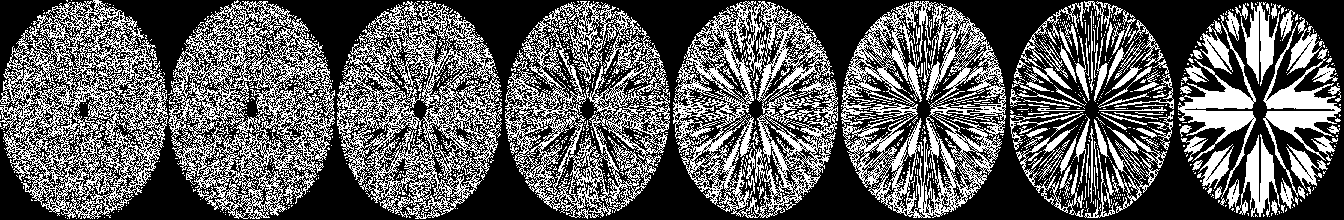

In [95]:
slices = np.concatenate((slice_1, slice_2, slice_3, slice_4, slice_5, slice_6, slice_7, slice_8), axis=1)
displayImage(Image.fromarray(slices), w*3, h//2)

* Dada la imagen *onedollar.jpg*, convertirla a niveles de gris y mostrar todos los bit-planes (8 bit). A partir de los bit-planes obtenidos, reconstruir la imagen usando diferentes bit-planes (Experimentar usando los planos 8-7-6-5-1).

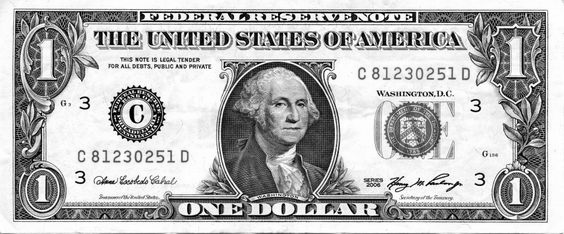

In [96]:
onedollar_bw = Image.open('img/onedollar.jpg').convert('L')
onedollar_bw_int = np.asarray(fractal, dtype='uint8')
w, h = onedollar.size
displayImage(onedollar_bw, w, h)

In [97]:
dollar_slice_1 = bitslice(onedollar_bw, 0)
dollar_slice_2 = bitslice(onedollar_bw, 1)
dollar_slice_3 = bitslice(onedollar_bw, 2)
dollar_slice_4 = bitslice(onedollar_bw, 3)
dollar_slice_5 = bitslice(onedollar_bw, 4)
dollar_slice_6 = bitslice(onedollar_bw, 5)
dollar_slice_7 = bitslice(onedollar_bw, 6)
dollar_slice_8 = bitslice(onedollar_bw, 7)

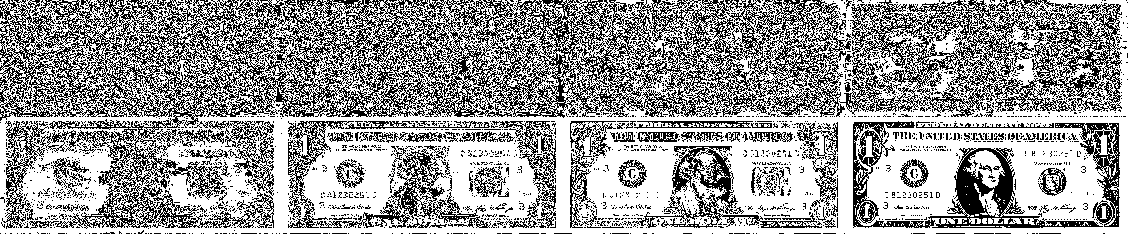

In [100]:
slices_1_4 = np.concatenate((dollar_slice_1, dollar_slice_2, dollar_slice_3, dollar_slice_4), axis=1)
slices_5_8 = np.concatenate((dollar_slice_5, dollar_slice_6, dollar_slice_7, dollar_slice_8), axis=1)
dollar_all_slices = np.concatenate((slices_1_4, slices_5_8), axis=0)
displayImage(Image.fromarray(dollar_all_slices), w*2, h)

In [132]:
def reconstruct_from_slices(slices, shape, slice1=None, slice2=None, slice3=None, slice4=None, slice5=None, slice6=None, slice7=None, slice8=None):
    
    one = np.ones(shape, dtype='uint8')

    all_slices = np.zeros((8, shape[0], shape[1]), dtype='uint8')

    if slice1 is not None:
        slice1_bit = np.bitwise_and(slice1, one)
        slice1_bit = np.left_shift(slice1_bit, 0)
        all_slices[:][:][0] = slice1_bit
    if slice2 is not None:
        slice2_bit = np.bitwise_and(slice2, one)
        slice2_bit = np.left_shift(slice2_bit, 1)
        all_slices[:][:][1] = slice2_bit
    if slice3 is not None:
        slice3_bit = np.bitwise_and(slice3, one)
        slice3_bit = np.left_shift(slice3_bit, 2)
        all_slices[:][:][2] = slice3_bit
    if slice4 is not None:
        slice4_bit = np.bitwise_and(slice4, one)
        slice4_bit = np.left_shift(slice4_bit, 3)
        all_slices[:][:][3] = slice4_bit
    if slice5 is not None:
        slice5_bit = np.bitwise_and(slice5, one)
        slice5_bit = np.left_shift(slice5_bit, 4)
        all_slices[:][:][4] = slice5_bit
    if slice6 is not None:
        slice6_bit = np.bitwise_and(slice6, one)
        slice6_bit = np.left_shift(slice6_bit, 5)
        all_slices[:][:][5] = slice6_bit
    if slice7 is not None:
        slice7_bit = np.bitwise_and(slice7, one)
        slice7_bit = np.left_shift(slice7_bit, 6)
        all_slices[:][:][6] = slice7_bit
    if slice8 is not None:
        slice8_bit = np.bitwise_and(slice8, one)
        slice8_bit = np.left_shift(slice8_bit, 7)
        all_slices[:][:][7] = slice8_bit

    reconstruction = np.zeros(shape, dtype='uint8')
    for i in range(len(slices)):
        reconstruction = np.bitwise_or(reconstruction, all_slices[:][:][slices[i]])

    # Normalize to the [0,255] range
    reconstruction = np.uint8((reconstruction - reconstruction.min()) / (reconstruction.max() - reconstruction.min()) * 255)

    return reconstruction

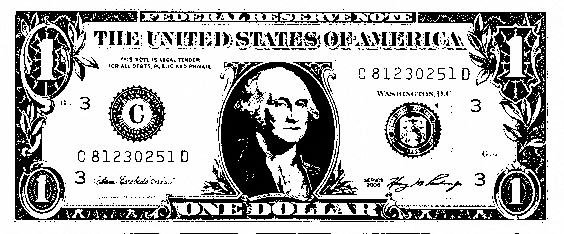

In [133]:
reconstruction_1_8 = reconstruct_from_slices((0,7), np.shape(dollar_slice_1), slice1=dollar_slice_1, slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_8), w, h)

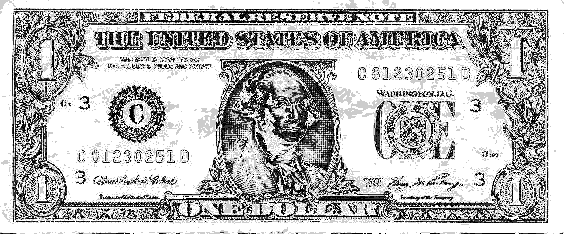

In [140]:
reconstruction_5_7 = reconstruct_from_slices((4,6), np.shape(dollar_slice_5), 
                                                    slice5=dollar_slice_5, slice7=dollar_slice_7)
displayImage(Image.fromarray(reconstruction_5_7), w, h)

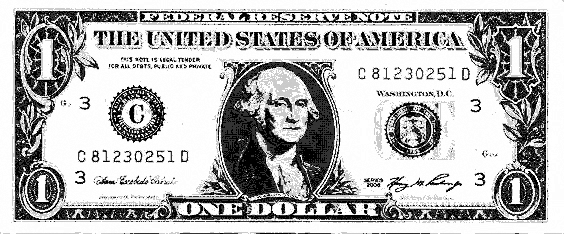

In [142]:
reconstruction_1_5_8 = reconstruct_from_slices((0,5,7), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice6=dollar_slice_6, 
                                                    slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_5_8), w, h)

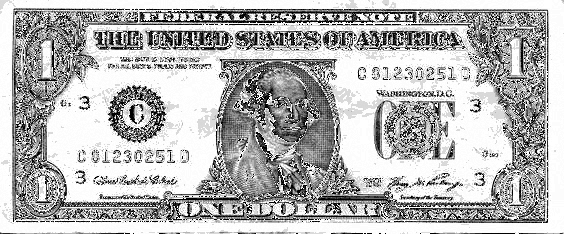

In [138]:
reconstruction_1_5_6_7 = reconstruct_from_slices((0,4,5,6), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice5=dollar_slice_5, 
                                                    slice6=dollar_slice_6, slice7=dollar_slice_7)
displayImage(Image.fromarray(reconstruction_1_5_6_7), w, h)

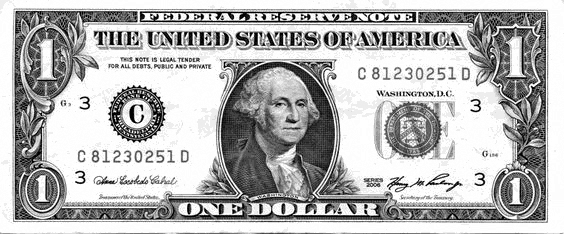

In [134]:
reconstruction_1_5_6_7_8 = reconstruct_from_slices((0,4,5,6,7), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice5=dollar_slice_5, 
                                                    slice6=dollar_slice_6, slice7=dollar_slice_7,
                                                    slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_5_6_7_8), w, h)

***
### 4. Explicar que es un histograma de una imagen. Escribir un código para calcularlo.

***
### 5. Explicar qué diferencia hay entre el brillo y contraste. Mostrar ejemplos.

***
### 6. Escribir un código que modifique el brillo y contraste de una imagen.

***
### 7.  ¿Para qué se usa la ecualización de un histograma? Dar ejemplos.

***
### 8. High Dynamic Range (HDR) Imaging
Investigar que es HDR y aplicarlo a las imágenes *office_x.jpg* (x=1-6).

Tiempos de exposicion : [0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000]

Leer https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/